# Plot the water leaving reflectance 

En este notebook vamos a explorar el comportamiento de la reflectancia saliente del agua para distintos contenidos de clorofila, y sedimiento.

## Introduccion a python

Si nunca uso un notebook de jupyter es muy sencillo. Hay celdas con texto, como esta, y celdas con codigo, como la de abajo.

Para ejecutar una celda con código haga click en ella y luego en `>|run` en la barra de herramientas o `ctrl+enter`.

In [19]:
2+2

4

La siguiente celda es importante, ya que carga todas las herramientas que vamos a usar. No se preocupe para que sirve, solo parece en ella y haga click en `>|run` o `ctrl+enter`

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interpn

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Además vamos a necesitar algunos parametros más, son tablas y cosas. De nuevo, parecé arriba y haga click en `>|run` o `ctrl+enter`. Ya después de esto empezamos a trabajar.

In [20]:
chl_range = np.logspace(-3,2,11)
sed_range = np.array([0,1,10,100,1000])
ys_range = np.array([0])
det_range = np.array([0])

wl = np.linspace(405,700,20)
wl = np.append(wl, [750, 865, 900])

rho_arr = np.load("rho_arr.npy")

def f(chl, sed):
    return interpn((chl_range, sed_range), rho_arr[:,:,0,0,:], (chl,sed))[0]

sea_wl = np.array([412., 443., 490., 510., 555., 670., 765., 865.])
c = np.round(np.random.uniform(0,10),0)
s = np.round(np.random.uniform(0,15),1)*10
sea = interp1d(wl, f(c, s))(sea_wl)


## Agua, clorofila y sedimentos

la cantidad de clorofila que tenemos en agua va a producir que cambie la firma espectral. La funcion que lo describe, presenta lugares de absorcion y reflectancia.

Text(0, 0.5, '$\\rho$')

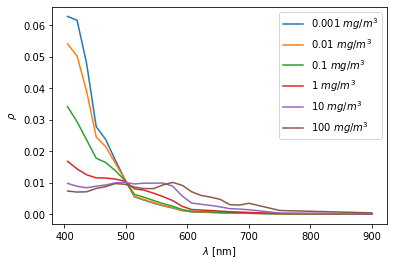

In [24]:
for c in [0.001,0.01,0.1,1,10,100]:
    plt.plot(wl, f(c, 0), label=rf"{c} $mg/m^3$")

plt.legend()

plt.xlabel(rf"$\lambda$ [nm]")
plt.ylabel(rf"$\rho$")


In [ ]:
Además, la cantidad de sedimentos también cambia la firma espectral

Text(0, 0.5, '$\\rho$')

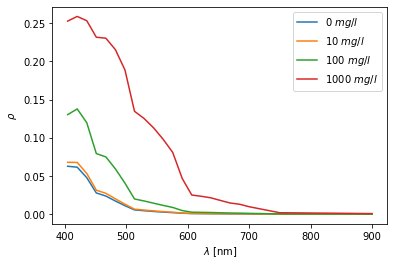

In [26]:
for s in [0,10,100,1000]:
    plt.plot(wl, f(0.001, s), label=rf"{s} $mg/l$")

plt.legend()

plt.xlabel(rf"$\lambda$ [nm]")
plt.ylabel(rf"$\rho$")


La combinación de ambas permite obtener distintas firmas espectrales

Text(0, 0.5, '$\\rho$')

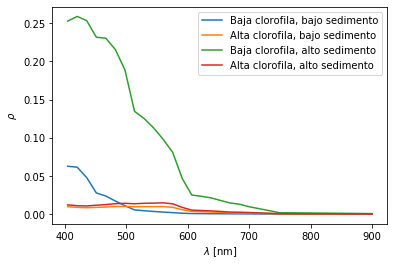

In [27]:
plt.plot(wl, f(0.001, 0), label=rf"Baja clorofila, bajo sedimento")
plt.plot(wl, f(10, 0), label=rf"Alta clorofila, bajo sedimento")
plt.plot(wl, f(0.001, 1000), label=rf"Baja clorofila, alto sedimento")
plt.plot(wl, f(10, 100), label=rf"Alta clorofila, alto sedimento")

plt.legend()

plt.xlabel(rf"$\lambda$ [nm]")
plt.ylabel(rf"$\rho$")


### Actividad: explore ahora usted la cantidad de clorofila y sedimento.

In [62]:
def plt_f(chl, sed=0):
    plt.plot(wl, f(chl, sed))
    plt.xlabel(rf"$\lambda$ [nm]")
    plt.ylim(bottom=-0.003, top=0.05)
    plt.ylabel(rf"$\rho$")

interact(plt_f, chl = widgets.FloatSlider(value=5, min=0.01, max=10, step=.1), sed = widgets.FloatSlider(value=0, min=0, max=150, step=10))

interactive(children=(FloatSlider(value=5.0, description='chl', max=10.0, min=0.01), FloatSlider(value=0.0, de…

<function __main__.plt_f(chl, sed=0)>

## Que mide el satélite



El satelite mide en distintas bandas que nos aportan informacion para poder encontrar los valores de clorofila.

In [31]:
sea_wl = np.array([412., 443., 490., 510., 555., 670., 765., 865.])
c = np.round(np.random.uniform(0,10),0)
s = np.round(np.random.uniform(0,15),1)*10
sea = interp1d(wl, f(1, 0))(sea_wl)

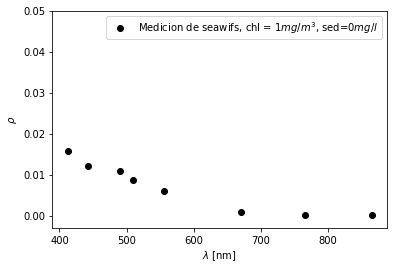

In [35]:
plt.plot(sea_wl, sea, 'ko', label="Medicion de seawifs, chl = 1$mg/m^3$, sed=0$mg/l$")
plt.xlabel(rf"$\lambda$ [nm]")
plt.ylim(bottom=-0.003, top=0.05)
plt.ylabel(rf"$\rho$")
plt.legend()

### Actividad: encuentre que contenido de clorofila reproduce los datos de con 2 bandas

In [67]:
c = np.round(np.random.uniform(0,10),1)
s = 0
sea = interp1d(wl, f(c, 0))(sea_wl)

In [79]:
def plt_f(chl, sed=0):
    plt.plot(sea_wl[[2,3]], sea[[2,3]], 'ko')
    plt.plot(wl, f(chl, sed))
    plt.xlabel(rf"$\lambda$ [nm]")
    plt.ylim(bottom=-0.003, top=0.05)
    plt.ylabel(rf"$\rho$")

interact(plt_f, chl = widgets.FloatSlider(value=0.1, min=0.001, max=11, step=.1), sed = 0)

interactive(children=(FloatSlider(value=0.1, description='chl', max=11.0, min=0.001), IntSlider(value=0, descr…

<function __main__.plt_f(chl, sed=0)>

### Actividad: encuentre que contenido de clorofila reproduce los datos de seawifs

In [78]:
def plt_f(chl, sed=0):
    plt.plot(sea_wl, sea, 'ko')
    plt.plot(wl, f(chl, sed))
    plt.xlabel(rf"$\lambda$ [nm]")
    plt.ylim(bottom=-0.003, top=0.05)
    plt.ylabel(rf"$\rho$")

interact(plt_f, chl = widgets.FloatSlider(value=0, min=0.001, max=11, step=0.1), sed = 0)

interactive(children=(FloatSlider(value=0.001, description='chl', max=11.0, min=0.001), IntSlider(value=0, des…

<function __main__.plt_f(chl, sed=0)>

### Actividad: encuentre que contenido de clorofila y sedimentos reproduce los datos de seawifs

In [81]:
c = np.round(np.random.uniform(0,10),1)
s = np.round(np.random.uniform(0,15),0)*10
sea = interp1d(wl, f(c, s))(sea_wl)

In [82]:
def plt_f(chl, sed=0):
    plt.plot(sea_wl, sea, 'ko')
    plt.plot(wl, f(chl, sed))
    plt.xlabel(rf"$\lambda$ [nm]")
    plt.ylim(bottom=-0.003, top=0.05)
    plt.ylabel(rf"$\rho$")

interact(plt_f, chl = widgets.FloatSlider(value=0, min=0.001, max=11, step=0.1), sed = widgets.FloatSlider(value=0, min=0, max=150, step=10))

interactive(children=(FloatSlider(value=0.001, description='chl', max=11.0, min=0.001), FloatSlider(value=0.0,…

<function __main__.plt_f(chl, sed=0)>

In [80]:
c,s

(4.9, 38.0)